In [9]:
# !pip install ultralytics

In [10]:
# !pip install squarify

In [11]:
# import libraries

from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import random
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

# import warnings
%matplotlib inline


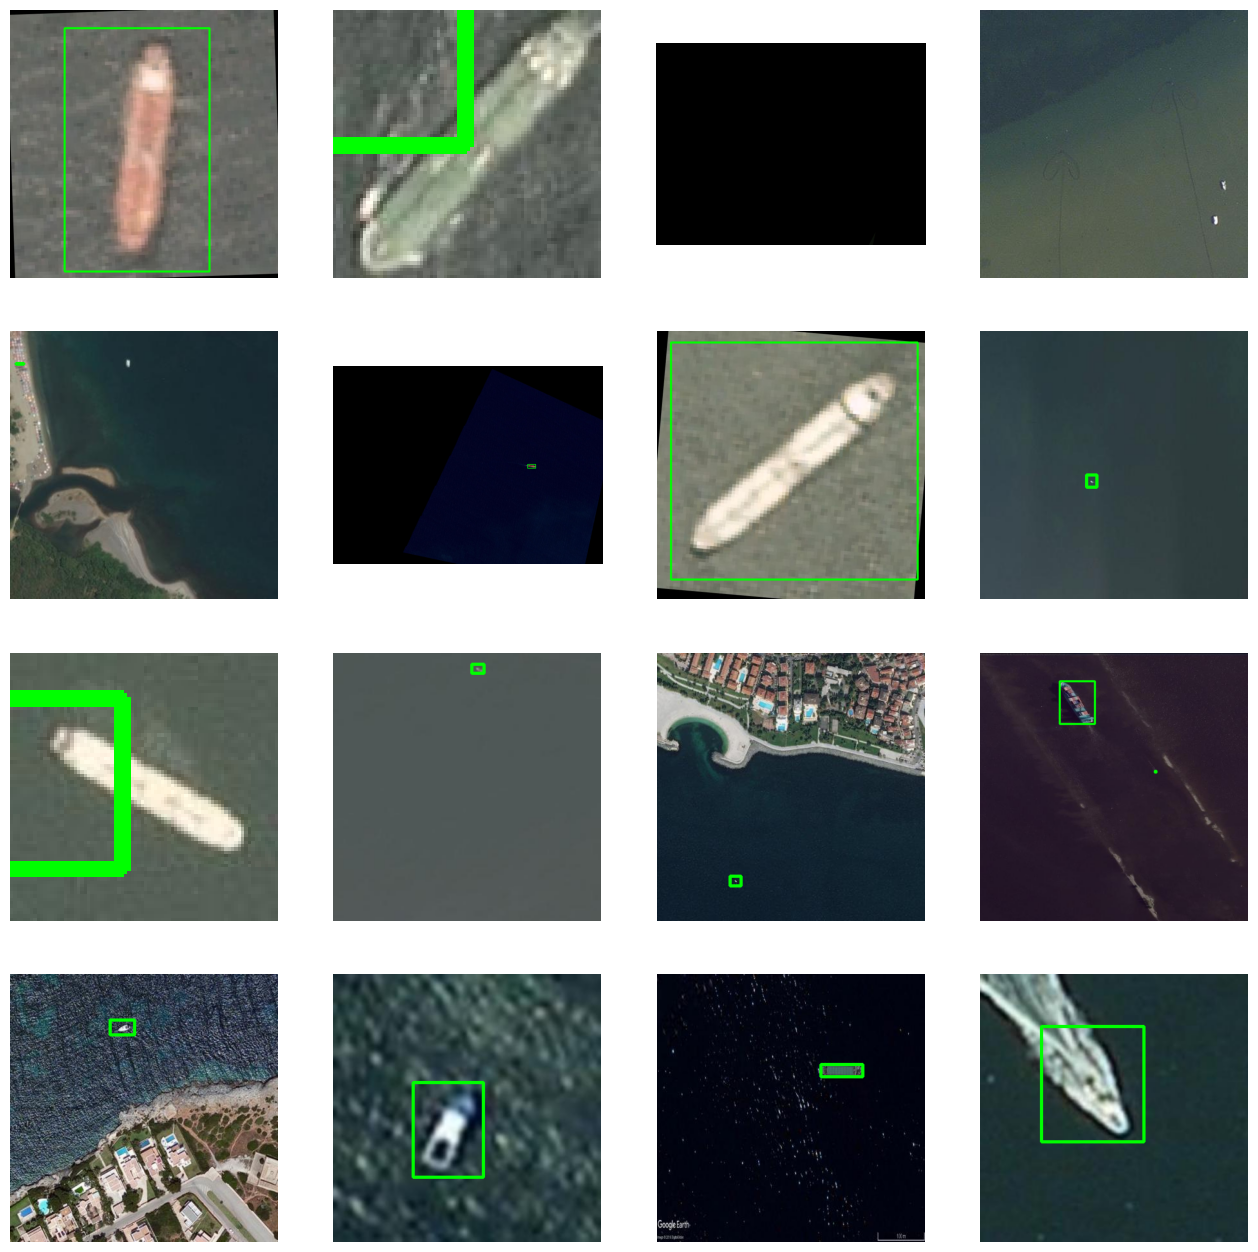

In [12]:
train_images = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\train\images"
val_images = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\valid\images"
test_images = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\test\images"

train_labels = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\train\labels"
val_labels = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\valid\labels"
test_labels = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\test\labels"

# Mendapatkan list keseluruhan gambar kapal
image_files = os.listdir(train_images)

# Pilih secara acak 16 gambar
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## `Training Model`

In [13]:
dataset = r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\data.yaml"

In [14]:
model = YOLO('yolov8s.yaml').load('yolov8s.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

In [15]:
model.train(epochs=100,
            data=dataset,
            patience=70,
            imgsz=256,
            batch=32,
            save=True,
            workers=0,
            optimizer='Adamax',
            project='Ship Detection',
            name='First_Training_Smallpt',
            cache=True,
            device='cpu',
            exist_ok=True,
            resume=True)

Ultralytics YOLOv8.0.154  Python-3.10.0 torch-2.0.1+cpu CPU (AMD A8-6410 APU with AMD Radeon R5 Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=E:\yolov8\Ship_Detection_Project\ships-aerial-images\data.yaml, epochs=100, patience=50, batch=32, imgsz=256, save=True, save_period=-1, cache=True, device=cpu, workers=0, project=Ship Detection, name=First_Training_Smallpt, exist_ok=True, pretrained=True, optimizer=Adamax, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

RuntimeError: Dataset 'E://yolov8/Ship_Detection_Project/ships-aerial-images/data.yaml' error  
Dataset 'E://yolov8/Ship_Detection_Project/ships-aerial-images/data.yaml' images not found , missing path 'E:\yolov8\Ship_Detection_Project\ships-aerial-images\r"E:\yolov8\Ship_Detection_Project\ships-aerial-images\valid"'
Note dataset download directory is 'E:\yolo-test\datasets'. You can update this in 'C:\Users\Administrator\AppData\Roaming\Ultralytics\settings.yaml'